In [ ]:
!pip install mediapipe

In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic

# For static images:
pose = mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5)

# This function returns the Original Landmarks & Cleaned landmarks points

In [ ]:
# we collect only (x,y) co-ordinates of posture

def image_processing(file):

  image = cv2.imread(file)

  # Convert the BGR image to RGB before processing.
  results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  
  try:

    data = results.pose_landmarks

    data = str(data)

    data = data.strip().split('\n')

    garbage = ['landmark {', '}']

    without_garbage = []

    for i in data:
        if i.startswith('  z:'):
            continue

        if i.startswith('  visibility:'):
            continue

        if i.startswith('  presence:'):
            continue
        
        else:
            if i not in garbage:
                without_garbage.append(i)

    clean = []


    for i in without_garbage:
      i = i.strip()
      clean.append(i[3:])

    for i in range(0, len(clean)):
      clean[i] = float(clean[i])

    return(results.pose_landmarks, clean)

  except:
    x = np.zeros((1, 66), dtype=float)[0]
    return(results.pose_landmarks, x)

# This function used to draw on the image

In [ ]:
# Draw pose landmarks on the image.
def draw(landmarks, image_file):

  image = cv2.imread(image_file)
  annotated_image = image.copy()
  mp_drawing.draw_landmarks(annotated_image, landmarks, mp_pose.POSE_CONNECTIONS)

  plt.figure(figsize=(24,12))

  og_img = cv2.imread(image_file)
  og_img = cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB)

  plt.subplot(2,1,1)
  plt.imshow(og_img)

  plt.subplot(2,1,2)
  annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
  plt.imshow(annotated_image)

  plt.show()


# Checking one random Image

Length of Landmarks - 66


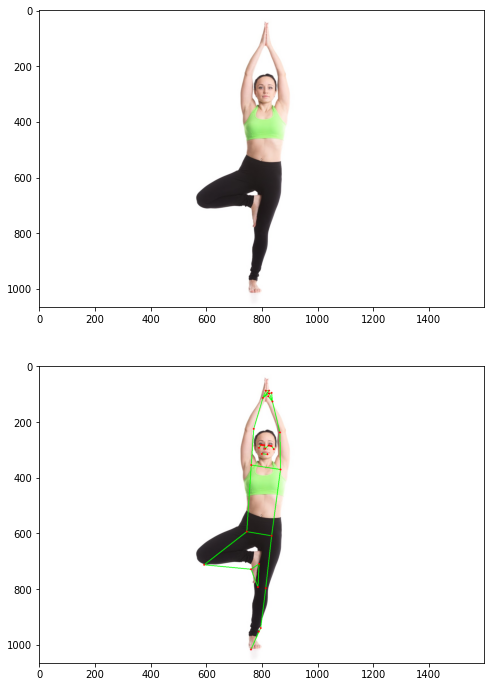

In [ ]:
file = "/content/drive/MyDrive/Datasets/Yoga Poses/Train/tree/File36.jpg"

landmarks, clean = image_processing(file)
print(f"Length of Landmarks - {len(clean)}")

draw(landmarks, file)

# Checking Training folder

In [ ]:
path = '/content/drive/MyDrive/Datasets/Yoga Poses/Train'

count = 0

for each_folder in sorted(os.listdir(path)):

  for img in sorted(os.listdir(os.path.join(path, each_folder))):
    if img == ".DS_Store":
      continue

    else:
      count += 1
  
  print(f"{each_folder} - {count}")
  
  count = 0

bridge - 64
childs - 66
downwarddog - 90
mountain - 160
plank - 53
seatedforwardbend - 59
tree - 64
trianglepose - 65
warrior1 - 55
warrior2 - 58


# Creating the CSV file

In [ ]:
# create .csv file to store our data
filename = open('yoga.csv', 'a')

In [ ]:
# these are the images which have more than one person in image
# and we want to avoid image with more than one person
no_img = [
          '/content/drive/MyDrive/Datasets/Yoga Poses/Train/bridge/File7.jpg',
          "/content/drive/MyDrive/Datasets/Yoga Poses/Train/bridge/File18.jpg",
          "/content/drive/MyDrive/Datasets/Yoga Poses/Train/bridge/File55.jpg",
          "/content/drive/MyDrive/Datasets/Yoga Poses/Train/plank/File42.jpg",
          "/content/drive/MyDrive/Datasets/Yoga Poses/Train/tree/File30.jpg",
          "/content/drive/MyDrive/Datasets/Yoga Poses/Train/tree/File46.jpg",
          "/content/drive/MyDrive/Datasets/Yoga Poses/Train/tree/File75.jpg",
          "/content/drive/MyDrive/Datasets/Yoga Poses/Train/trianglepose/File24.jpg",
          "/content/drive/MyDrive/Datasets/Yoga Poses/Train/trianglepose/File41.jpg",
          "/content/drive/MyDrive/Datasets/Yoga Poses/Train/trianglepose/File49.jpg",
          "/content/drive/MyDrive/Datasets/Yoga Poses/Train/trianglepose/File83.jpg",
          "/content/drive/MyDrive/Datasets/Yoga Poses/Train/warrior1/File23.jpg",
          "/content/drive/MyDrive/Datasets/Yoga Poses/Train/warrior2/File13.jpg",
          "/content/drive/MyDrive/Datasets/Yoga Poses/Train/warrior2/File59.jpg"
]

In [ ]:
for each_folder in sorted(os.listdir(path)):

  for img in sorted(os.listdir(os.path.join(path, each_folder))):
    
    if img == ".DS_Store":
      continue

    else:
      img_path = os.path.join(path, each_folder, img)
      
      for img in no_img:
        if img_path == img:
          continue

      try:
        landmarks, clean_data = image_processing(img_path)
        

        for i in clean_data:
          filename.write(str(i))
          filename.write(',')
      
      except:
        for i in np.zeros((1, 66), dtype=float)[0]:
          filename.write(str(i))
          filename.write(',')
      
    filename.write(each_folder)
    filename.write('\n')

  print('Done - ', each_folder)

Done -  bridge
Done -  childs
Done -  downwarddog
Done -  mountain
Done -  plank
Done -  seatedforwardbend
Done -  tree
Done -  trianglepose
Done -  warrior1
Done -  warrior2
